In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df.head()

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


In [72]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,upper_range,lower_range
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


<Axes: xlabel='X1', ylabel='X2'>

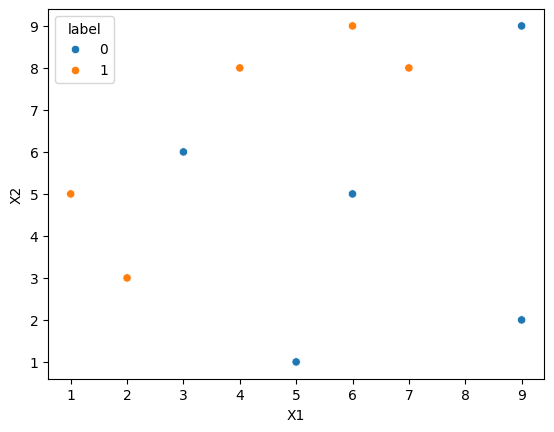

In [7]:
sns.scatterplot(x = df['X1'], y = df['X2'], hue = df['label'])

In AdaBoost we assign the weights to each and every row.

The weight is calculated by: weight = 1/n.
Where n = number of rows.

Suppose you have `n` rows so the weight of each row is: `1/n`. And if you sum up all the weights you will get 1.

`weights = (1/n) + (1/n) + (1/n) +......+ n_times = n/n = 1`

## Step 1 (First Model): Assigning Weights

In [9]:
df['weights'] = 1/df.shape[0]
df.head()

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


Here in the AdaBoost the DecisionTreeClassifier has the max_depth of 1, and this is called the decision stumps. We can also say it as a Shallow Decision Tree.

In [16]:
first_decision_tree = DecisionTreeClassifier(max_depth = 1)

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

## Step 2 (First Model): Training our first model

In [18]:
first_decision_tree.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

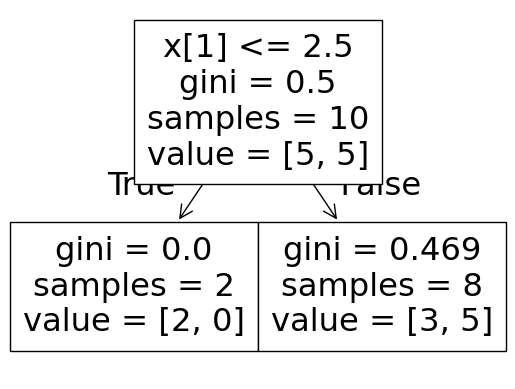

In [19]:
plot_tree(first_decision_tree)

<Axes: >

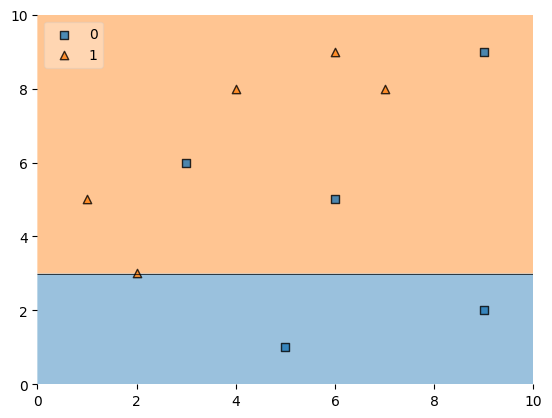

In [20]:
plot_decision_regions(X, y, clf = first_decision_tree, legend = 2)

In [22]:
df['y_pred'] = first_decision_tree.predict(X)
df.head()

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0


In [50]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

"""
NOTE: Always Add 0.00000001 as a smallest term to the error in the denominator.
Suppose if your error is 0, then it this function will return infinity. You can
imagine how stupid it is. So add some smallest term to the denominator,
thats it no bullshit talks now.
"""

'\nNOTE: Always Add 0.00000001 as a smallest term to the error in the denominator.\nSuppose if your error is 0, then it this function will return infinity. You can\nimagine how stupid it is. So add some smallest term to the denominator, \nthats it no bullshit talks now.\n'

## Step 3(First Model): Calculate the model weight [alpha]

In [24]:
alpha_for_model_1 = calculate_model_weight(0.3)
print("Weight of the first model is: ", alpha_for_model_1)

Weight of the first model is:  0.42364893019360184


## Step 4(First Model): Update the Weights

- For misclassified
  ```
  new_weight = current_weight * e ^ (alpha)
  ```

- For correctly classified
  ```
  new_weight = current_weight * e ^ -(alpha)
  ```


In [25]:
def update_row_weights(row, alpha = 0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [31]:
df['updated_weights'] = df.apply(update_row_weights, axis = 1)
print("Sum of all the Updated Weights: ", df['updated_weights'].sum())
df.head()

Sum of all the Updated Weights:  0.9165153319682015


,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475


As we know from the theory that the sum of the updated weights will never be equal to 1, we need to normalize the weights to get the sum of all the weights to 1.

We have to do the normalization of the points that is we will divide each weights with the sum.

```
normalized_weights = current_weight / sum_of_all_updated_weights
```

In [30]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
print("Sum of the Normalized Weights: ", df['normalized_weights'].sum())
df.head()

Sum of the Normalized Weights:  1.0


,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475


## Step 5(First Model): Building the Range

In [33]:
df['upper_range'] = np.cumsum(df['normalized_weights'])
df['lower_range'] = df['upper_range'] - df['normalized_weights']
df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'normalized_weights', 'lower_range', 'upper_range']]

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,lower_range,upper_range
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [34]:
print("Shape of the Dataframe/Dataset: ", df.shape)

Shape of the Dataframe/Dataset:  (10, 9)


Now we will generate random numbers in the range of 0 to 1.

As we can see that there are 10 rows so we need to create 10 random numbers, so the range in which they lie with out data we will pick that row.

So after generating the random numbers, we are picking the row according to the range so we will call this process as the Upsampling.

## Step 6(First Model): Upsampling

In [37]:
def create_new_dataset(df):
  indices = []
  for i in range(df.shape[0]): # Lopp for X1 times, here X1 = 10, so 10 times.
    a = np.random.random() # Creating random numbers
    for index, row in df.iterrows():
      if row['upper_range'] > a and a > row['lower_range']: # Checking where the random numbers is lying within the range.
          indices.append(index) # Picking the index number of that range and appending to the indices array
  return indices

In [38]:
index_values = create_new_dataset(df)
index_values

[8, 1, 1, 7, 2, 4, 0, 8, 6, 6]

In [39]:
second_df = df.iloc[index_values, [0, 1, 2, 3]]
second_df.head()

,X1,X2,label,weights
8,9,9,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1


## For Model 2: Decision Tree

- m1 = Decision Tree 1
- m2 = Decision Tree 2

In [40]:
second_decision_tree = DecisionTreeClassifier(max_depth = 1)

In [42]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [44]:
second_decision_tree.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.625, 0.5, '  False')]

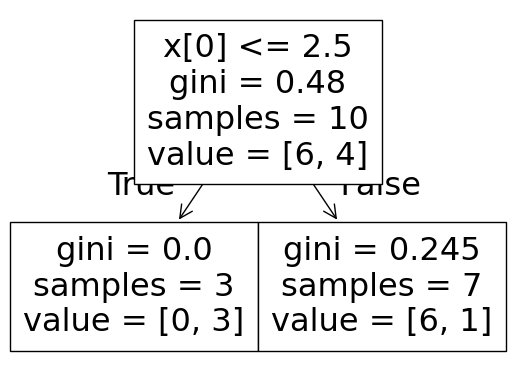

In [45]:
plot_tree(second_decision_tree)

<Axes: >

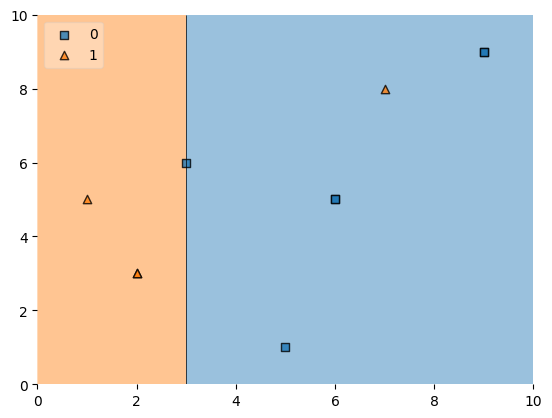

In [46]:
plot_decision_regions(X, y, clf = second_decision_tree, legend = 2)

In [48]:
second_df['y_pred'] = second_decision_tree.predict(X)
second_df.head()

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
1,2,3,1,0.1,1
1,2,3,1,0.1,1
7,7,8,1,0.1,0
2,3,6,0,0.1,0


## Second Model: Weight of the Second Model

In [55]:
alpha_for_model_2 = calculate_model_weight(0.1)
print("Weight of the second model is: ", alpha_for_model_2)

Weight of the second model is:  1.0986122886681098


## Second Model: Updating the rows weights

In [51]:
def update_row_weights(row, alpha = 1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [53]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis = 1)
print("Sum of all the Updated Weights: ", second_df['updated_weights'].sum())
second_df.head()

Sum of all the Updated Weights:  0.6000222515923667


,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
7,7,8,1,0.1,0,0.297427
2,3,6,0,0.1,0,0.033622


## Second Model: Normalizing the weights

In [54]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
print("Sum of all the Normalized Weights: ", second_df['normalized_weights'].sum())
second_df.head()

Sum of all the Normalized Weights:  0.9999999999999999


,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
8,9,9,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,0,0.297427,0.495694
2,3,6,0,0.1,0,0.033622,0.056034


## Second Model: Building the Ranges

In [56]:
second_df['upper_range'] = np.cumsum(second_df['normalized_weights'])
second_df['lower_range'] = second_df['upper_range'] - second_df['normalized_weights']
second_df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'normalized_weights', 'lower_range', 'upper_range']]

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,lower_range,upper_range
8,9,9,0,0.1,0,0.033622,0.056034,0.000000,0.056034
1,2,3,1,0.1,1,0.033622,0.056034,0.056034,0.112068
1,2,3,1,0.1,1,0.033622,0.056034,0.112068,0.168102
7,7,8,1,0.1,0,0.297427,0.495694,0.168102,0.663796
2,3,6,0,0.1,0,0.033622,0.056034,0.663796,0.719830
4,5,1,0,0.1,0,0.033622,0.056034,0.719830,0.775864
0,1,5,1,0.1,1,0.033622,0.056034,0.775864,0.831898
8,9,9,0,0.1,0,0.033622,0.056034,0.831898,0.887932
6,6,5,0,0.1,0,0.033622,0.056034,0.887932,0.943966
6,6,5,0,0.1,0,0.033622,0.056034,0.943966,1.000000


In [58]:
index_values = create_new_dataset(second_df)
print("Index Values: ", index_values)

Index Values:  [0, 7, 6, 1, 4, 7, 7, 6, 1, 7]


## Third Model

In [59]:
third_df = second_df.iloc[index_values, [0,1,2,3]]
third_df.head()

,X1,X2,label,weights
8,9,9,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1


## Third Model: Decision Tree Classifier

In [60]:
third_decision_tree = DecisionTreeClassifier(max_depth=1)

X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

third_decision_tree.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

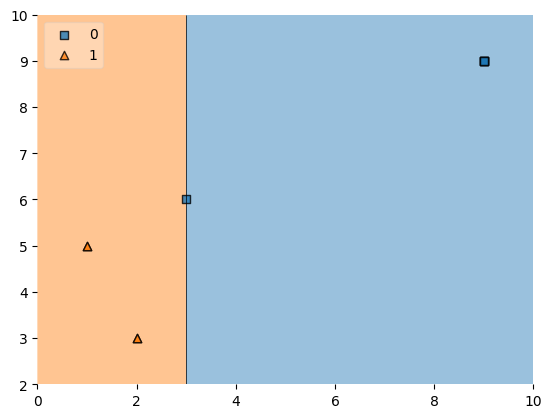

In [61]:
plot_decision_regions(X, y, clf = third_decision_tree, legend = 2)

In [62]:
third_df['y_pred'] = third_decision_tree.predict(X)
third_df.head()

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0


## Third Model: Calculating the weights of the model

In [63]:
alpha_for_model_3 = calculate_model_weight(0.7)
print("Weight of the third model is: ", alpha_for_model_3)

Weight of the third model is:  -0.4236489301936017


In [64]:
print("Weight of the first model is: ", alpha_for_model_1)
print("Weight of the second model is: ", alpha_for_model_2)
print("Weight of the third model is: ", alpha_for_model_3)

Weight of the first model is:  0.42364893019360184
Weight of the second model is:  1.0986122886681098
Weight of the third model is:  -0.4236489301936017


## Prediction - 1

In [82]:
query = np.array([1,5]).reshape(1,2)
real_value = 1
first_predicted_value = first_decision_tree.predict(query)
second_predicted_value = second_decision_tree.predict(query)
third_predicted_value = third_decision_tree.predict(query)

print("Real Value of the Query: ", real_value)

print()
print("Prediction of First Decision Tree: ", first_predicted_value)
print("Prediction of Second Decision Tree: ", second_predicted_value)
print("Prediction of Third Decision Tree: ", third_predicted_value)
print()

if first_predicted_value == real_value:
    print("First Decision Tree is Correct")
else:
    print("First Decision Tree is Incorrect")

print()
if second_predicted_value == real_value:
    print("Second Decision Tree is Correct")
else:
    print("Second Decision Tree is Incorrect")

print()
if third_predicted_value == real_value:
    print("Third Decision Tree is Correct")
else:
    print("Third Decision Tree is Incorrect")

Real Value of the Query:  1

Prediction of First Decision Tree:  [1]
Prediction of Second Decision Tree:  [1]
Prediction of Third Decision Tree:  [1]

First Decision Tree is Correct

Second Decision Tree is Correct

Third Decision Tree is Correct


In [83]:
adaboost_value = alpha_for_model_1 * (1) + alpha_for_model_2 * (1) + alpha_for_model_3 * (1)
print("AdaBoost Value: ", adaboost_value)

AdaBoost Value:  1.09861228866811


In [84]:
predicted_value = np.sign(adaboost_value)
print("Predicted Value: ", predicted_value)

Predicted Value:  1.0


In [85]:
if real_value > 0.0:
  real_value = real_value
else:
  real_value = -1.0

print("Updated Real Value: ", real_value)

Updated Real Value:  1


In [86]:
if(real_value == predicted_value):
  print("Your AdaBoost Algorithm is correct.")
else:
  print("Your AdaBoost Algorithm is not correct.")

Your AdaBoost Algorithm is correct.


## Prediction - 2

In [87]:
query = np.array([9,9]).reshape(1,2)
real_value = 0
first_predicted_value = first_decision_tree.predict(query)
second_predicted_value = second_decision_tree.predict(query)
third_predicted_value = third_decision_tree.predict(query)

print("Real Value of the Query: ", real_value)

print()
print("Prediction of First Decision Tree: ", first_predicted_value)
print("Prediction of Second Decision Tree: ", second_predicted_value)
print("Prediction of Third Decision Tree: ", third_predicted_value)
print()

if first_predicted_value == real_value:
    print("First Decision Tree is Correct")
else:
    print("First Decision Tree is Incorrect")

print()
if second_predicted_value == real_value:
    print("Second Decision Tree is Correct")
else:
    print("Second Decision Tree is Incorrect")

print()
if third_predicted_value == real_value:
    print("Third Decision Tree is Correct")
else:
    print("Third Decision Tree is Incorrect")

Real Value of the Query:  0

Prediction of First Decision Tree:  [1]
Prediction of Second Decision Tree:  [0]
Prediction of Third Decision Tree:  [0]

First Decision Tree is Incorrect

Second Decision Tree is Correct

Third Decision Tree is Correct


In [88]:
adaboost_value = alpha_for_model_1 * (1) + alpha_for_model_2 * (-1) + alpha_for_model_3 * (-1)
print("AdaBoost Value: ", adaboost_value)

AdaBoost Value:  -0.2513144282809062


In [89]:
predicted_value = np.sign(adaboost_value)
print("Predicted Value: ", predicted_value)

Predicted Value:  -1.0


In [90]:
if real_value > 0.0:
  real_value = real_value
else:
  real_value = -1.0

print("Updated Real Value: ", real_value)

Updated Real Value:  -1.0


In [91]:
if(real_value == predicted_value):
  print("Your AdaBoost Algorithm is correct.")
else:
  print("Your AdaBoost Algorithm is not correct.")

Your AdaBoost Algorithm is correct.
